### Read data

In [2]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# We also want to plot graphs and histograms
import matplotlib.pyplot as plt

dataCondition1 = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition1["condition"] = "Arrow"
dataCondition1



,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow
8,A12,706.28000,206.15997,3,4,19,183.910190,Left aid,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow


In [3]:
dataCondition2 = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition2["condition"] = "NPC"
dataCondition2

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC
5,B06,926.88000,376.60010,5,2,15,328.679930,Yes,NPC
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC
8,B10,572.76000,547.55994,6,3,3,132.040010,Yes,NPC
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC


In [4]:
surveyDataA = pd.read_csv('surveyA.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataA

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,A00,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,A03,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
2,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,A04,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
3,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,A06,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
4,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,A08,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
5,2020/11/27 5:43:37 PM GMT+2,Yes,Yes!,A05,Male,22,"Warhammer 40k Dawn of War, Stronghold, Battlef...",Seeker,Yes!,"Nothing special, I just saw once white line be...","Tale at beggining was fantastic, music as well..."
6,2020/11/27 6:30:06 PM GMT+2,Yes,Yes!,A07,Male,22,"Death Stranding, Red Dead Redemption 2, XCOM 2",Seeker,Yes!,got stuck for a second between a rock and a wa...,Enjoyed the game and the soundtrack
7,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,A01,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
8,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,A11,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
9,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,A13,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


In [5]:
surveyDataB = pd.read_csv('surveyB.csv', header=0, names = ['study completion time', 'consent', 'downloaded game', 'participant number', 'gender', 'age', 'favorite games', 'player archetype', 'completed game', 'technical issues', 'additional comments'])  #Reading data where the arrow was the navigational aid
surveyDataB

,study completion time,consent,downloaded game,participant number,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,B00,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,B05,Female,20,"Portal 2, To The Moon, Terraria",Mastermind,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
2,2020/11/27 4:50:30 PM GMT+2,Yes,Yes!,B08,Male,17,"League of legends, World of warcraft and Apex ...",Conqueror,Yes!,I did not any of that,"I loved the game, good job on that and good lu..."
3,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,B09,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2",Achiever,Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
4,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,B01,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker,Yes!,NaN,On getting the text file to send back I accide...
5,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,B04,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
6,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,B12,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror,Yes!,NaN,The bees were too large. You had to be feeding...
7,2020/11/28 7:09:37 PM GMT+2,Yes,Yes!,B14,Male,22,"Warcraft 3, Borderlands 2, Stronghold Crusader",Mastermind,Yes!,frame rate and unresponsive movement controls ...,very cute
8,2020/11/28 7:16:54 PM GMT+2,Yes,Yes!,B17,Male,24,"Kingdom hearts 2, Fairy tail, League of Legends",Seeker,Yes!,"Didn't had any trouble, no lag runned smoothly",Longest chase in my life could have made it sh...
9,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,B07,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser,Yes!,NaN,i got lost alot


In [6]:
dataA = pd.merge(dataCondition1, surveyDataA, on='participant number')
dataA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
8,A12,706.28000,206.15997,3,4,19,183.910190,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


In [7]:
dataB = pd.merge(dataCondition2, surveyDataB, on='participant number')
dataB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC,2020/11/27 2:50:52 PM GMT+2,Yes,Yes!,Male,22,"World of Warcraft, League of Legends, Pokemon",Seeker,Yes!,NaN,The part I enjoyed the most was the soundtrack...
1,B01,464.32000,268.47998,2,3,3,77.880005,Yes,NPC,2020/11/28 10:48:06 AM GMT+2,Yes,Yes!,Male,26,"Bastion, Divinity Original Sin 2, Hollow Knight",Seeker,Yes!,NaN,On getting the text file to send back I accide...
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC,2020/12/01 12:17:35 PM GMT+2,Yes,Yes!,Female,22,"Legend of Zelda, Pokemon, Mario Kart",Seeker,Yes!,"I was stuck in dead end, with the bees behind ...","It was a long road, and I it got the tiniest b..."
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC,2020/11/28 2:49:01 PM GMT+2,Yes,Yes!,Male,20,-Rocket League\n-Life is Strange\n-The last of us,Seeker,Yes!,"No major ones, only thing I noticed was that t...",Actually a beautiful game! Had fun exploring a...
4,B05,493.96002,345.31995,6,2,7,90.439960,Yes,NPC,2020/11/27 3:52:51 PM GMT+2,Yes,Yes!,Female,20,"Portal 2, To The Moon, Terraria",Mastermind,Yes!,No technical issues.,It's weird that you can jump on plants as a fu...
5,B06,926.88000,376.60010,5,2,15,328.679930,Yes,NPC,2020/11/30 7:04:11 PM GMT+2,Yes,Yes!,Male,25,"Overwatch, Spider man (ps4),Borderlands 2.",Mastermind,Yes!,NaN,Everything looks amazing makes feel like you a...
6,B07,748.92000,502.84003,5,3,19,188.639980,Yes,NPC,2020/11/28 7:50:18 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, World war Z, This war of Mine",Socialiser,Yes!,NaN,i got lost alot
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC,2020/11/27 6:48:54 PM GMT+2,Yes,Yes!,Male,22,"Fallout New Vegas, Mafia II, Mass Effect 2",Achiever,Yes!,"Had no technical issues, overall game ran very...","Overall, the bear controlled very smoothly the..."
8,B10,572.76000,547.55994,6,3,3,132.040010,Yes,NPC,2020/12/01 1:11:54 AM GMT+2,Yes,Yes!,Female,28,"Echo, Oxenfree, Divinity Original Sin 2",Seeker,Yes!,I have stuck between the plants and the bees c...,NaN
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC,2020/11/28 3:54:46 PM GMT+2,Yes,Yes!,Male,22,"Fallout 1&2, Far Cry 2, Red Dead Redemption 2",Conqueror,Yes!,NaN,The bees were too large. You had to be feeding...


In [8]:
data = pd.concat([dataA, dataB]).reset_index(drop = True)
data.head(60)

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition,study completion time,consent,downloaded game,gender,age,favorite games,player archetype,completed game,technical issues,additional comments
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow,2020/11/27 2:08:16 PM GMT+2,Yes,Yes!,Male,23,"Fallout: New Vegas, Battlefield Bad Company 2,...",Daredevil,Yes!,NaN,Fun little game - I low key wonder if there we...
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow,2020/11/27 7:36:00 PM GMT+2,Yes,Yes!,Male,20,"GTA 5, NBA2k17, Among us",Achiever,Yes!,The only technical issue I experienced is load...,"Was fun running around, but the whole idea of ..."
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow,2020/12/01 3:23:01 PM GMT+2,Yes,Yes!,Male,22,"Age of Empires III, Kona, Battle Brothers",Seeker,Yes!,Slight FPS drop in a cave,NaN
3,A03,506.00000,419.67993,6,3,3,89.560000,Yes,Arrow,2020/11/27 4:04:04 PM GMT+2,Yes,Yes!,Female,22,"Portal, The last of us, League of legends",Mastermind,Yes!,NaN,NaN
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow,2020/11/27 4:34:02 PM GMT+2,Yes,Yes!,Male,29,"The Witcher 3, Crusader Kings 2, Europa Univer...",Mastermind,Yes!,NaN,Cool game! Would've like to get me some of tho...
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow,2020/11/27 4:48:14 PM GMT+2,Yes,Yes!,Female,26,"Tomb raider, Ori and the blind forest, Echo",Mastermind,Yes!,NaN,NaN
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow,2020/11/27 5:15:42 PM GMT+2,Yes,Yes!,Male,21,Age of Empires 3\nGrand Theft Auto: San Andrea...,Conqueror,Yes!,Lagging a little bit while you are at at cave...,This game needs more sexual content and violence
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow,2020/11/28 4:11:21 PM GMT+2,Yes,Yes!,Male,21,"Civilization V, CS:GO, Witcher 3",Survivor,Yes!,Laggy movement,NaN
8,A12,706.28000,206.15997,3,4,19,183.910190,Left aid,Arrow,2020/11/30 6:46:12 PM GMT+2,Yes,Yes!,Male,23,"Fallout 4, DnD, Darkest Dungeon",Seeker,Yes!,NaN,Love the music
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow,2020/11/28 4:42:45 PM GMT+2,Yes,Yes!,Male,23,"League of Legends, Europa Universalis 4, Rimworld",Mastermind,Yes!,No issues.,That was fun.


### Looking at the data

In [9]:
dataA.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,438.630526,418.957903,5.131579,2.736842,4.105263,67.286049,24.026316
std,128.434672,170.112659,1.961398,1.107327,4.814334,103.556945,4.016768
min,302.400000,206.159970,1.000000,0.000000,0.000000,0.000000,20.000000
25%,357.060030,310.239995,4.000000,2.000000,1.000000,0.209991,21.250000
50%,395.280000,379.660035,5.000000,3.000000,3.000000,21.500000,23.000000
75%,496.370027,536.070045,6.000000,4.000000,5.000000,87.630005,25.000000
max,837.000000,981.280000,9.000000,4.000000,19.000000,419.550000,36.000000


In [10]:
dataB.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,419.066666,404.813339,4.589744,2.615385,4.179487,71.375889,24.769231
std,148.702980,196.446839,2.209048,1.138221,5.457355,106.456044,3.786830
min,284.680000,191.239990,0.000000,0.000000,0.000000,0.000000,20.000000
25%,317.500000,297.580000,3.000000,2.000000,0.000000,0.000000,22.000000
50%,366.040000,352.520020,5.000000,3.000000,2.000000,28.160007,23.000000
75%,456.760000,452.560000,6.000000,4.000000,6.000000,93.694985,27.500000
max,926.880000,1318.360100,12.000000,4.000000,19.000000,419.799960,35.000000


In [11]:
data.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,428.721558,411.793773,4.857143,2.675325,4.142857,69.357526,24.402597
std,138.505970,182.851683,2.094569,1.117346,5.116316,104.362806,3.894192
min,284.680000,191.239990,0.000000,0.000000,0.000000,0.000000,20.000000
25%,336.400000,304.600000,4.000000,2.000000,0.000000,0.000000,22.000000
50%,377.800000,370.479980,5.000000,3.000000,2.000000,24.440002,23.000000
75%,479.120000,475.559970,6.000000,4.000000,6.000000,90.439960,26.000000
max,926.880000,1318.360100,12.000000,4.000000,19.000000,419.799960,36.000000


In [12]:
dataA.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.257533,-0.079173,0.015079,0.761598,0.689711,-0.084050
time going back,-0.257533,1.000000,0.720815,0.413610,-0.245884,-0.072644,0.045409
mistakes made,-0.079173,0.720815,1.000000,0.178144,-0.110269,0.033347,0.140199
shortcuts taken,0.015079,0.413610,0.178144,1.000000,0.040825,0.140472,-0.162463
times wandered away from navigational aid,0.761598,-0.245884,-0.110269,0.040825,1.000000,0.657215,-0.170655
time spent away from navigational aid,0.689711,-0.072644,0.033347,0.140472,0.657215,1.000000,-0.134776
age,-0.084050,0.045409,0.140199,-0.162463,-0.170655,-0.134776,1.000000


In [13]:
dataB.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.078623,-0.099858,0.124171,0.857956,0.711225,-0.026608
time going back,-0.078623,1.000000,0.805044,0.310357,-0.151553,-0.066316,-0.083396
mistakes made,-0.099858,0.805044,1.000000,0.050720,-0.183641,-0.106343,-0.162615
shortcuts taken,0.124171,0.310357,0.050720,1.000000,0.134265,0.168221,-0.106610
times wandered away from navigational aid,0.857956,-0.151553,-0.183641,0.134265,1.000000,0.650613,-0.111274
time spent away from navigational aid,0.711225,-0.066316,-0.106343,0.168221,0.650613,1.000000,0.147309
age,-0.026608,-0.083396,-0.162615,-0.106610,-0.111274,0.147309,1.000000


In [14]:
data.corr()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
time going forward,1.000000,-0.150738,-0.080751,0.078536,0.814265,0.697009,-0.059852
time going back,-0.150738,1.000000,0.766871,0.357615,-0.191915,-0.069754,-0.026086
mistakes made,-0.080751,0.766871,1.000000,0.114853,-0.151548,-0.044685,-0.029958
shortcuts taken,0.078536,0.357615,0.114853,1.000000,0.091080,0.153573,-0.138908
times wandered away from navigational aid,0.814265,-0.191915,-0.151548,0.091080,1.000000,0.652844,-0.137648
time spent away from navigational aid,0.697009,-0.069754,-0.044685,0.153573,0.652844,1.000000,0.007796
age,-0.059852,-0.026086,-0.029958,-0.138908,-0.137648,0.007796,1.000000


### Demographic data

In [15]:

#Gender
dataMale = data.loc[(data["gender"] == "Male"), "completed game"]
dataFemale = data.loc[(data["gender"] == "Female"), "completed game"]
print("Males: " + str(dataMale.count()))  # condition of males
print("Females: " + str(dataFemale.count()))# count of females


Males: 65
Females: 12


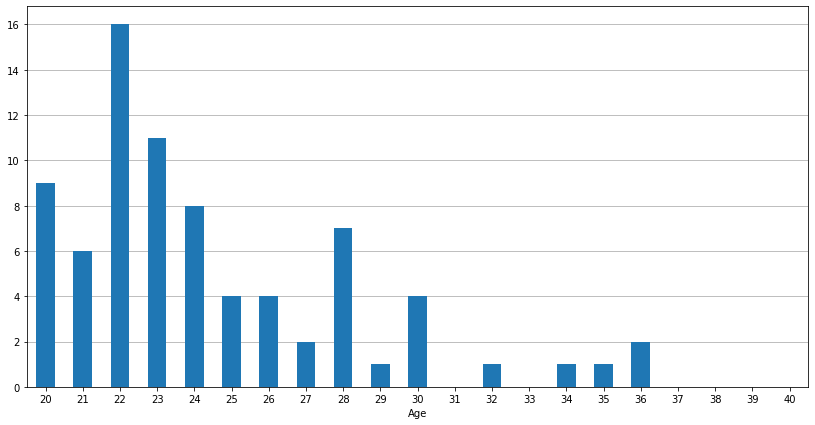

In [93]:
#Actual bar chart for the age
df = pd.DataFrame({'Age':['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
                          '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40'],
                   'val':[data.loc[(data["age"] == 20), "completed game"].count(),
                          data.loc[(data["age"] == 21), "completed game"].count(),
                          data.loc[(data["age"] == 22), "completed game"].count(),
                          data.loc[(data["age"] == 23), "completed game"].count(),
                          data.loc[(data["age"] == 24), "completed game"].count(),
                          data.loc[(data["age"] == 25), "completed game"].count(),
                          data.loc[(data["age"] == 26), "completed game"].count(),
                          data.loc[(data["age"] == 27), "completed game"].count(),
                          data.loc[(data["age"] == 28), "completed game"].count(),
                          data.loc[(data["age"] == 29), "completed game"].count(),
                          data.loc[(data["age"] == 30), "completed game"].count(),
                          data.loc[(data["age"] == 31), "completed game"].count(),
                          data.loc[(data["age"] == 32), "completed game"].count(),
                          data.loc[(data["age"] == 33), "completed game"].count(),
                          data.loc[(data["age"] == 34), "completed game"].count(),
                          data.loc[(data["age"] == 35), "completed game"].count(),
                          data.loc[(data["age"] == 36), "completed game"].count(),
                          data.loc[(data["age"] == 37), "completed game"].count(),
                          data.loc[(data["age"] == 38), "completed game"].count(),
                          data.loc[(data["age"] == 39), "completed game"].count(),
                          data.loc[(data["age"] == 40), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Age', y='val', rot=0, figsize=(14,7), legend=False, color='tab:blue')
ax.yaxis.grid(True)
ax.set_axisbelow(True)

Archetypes

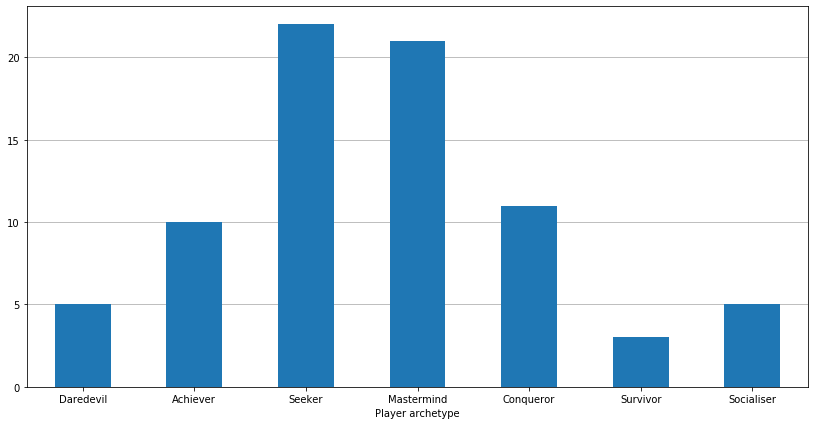

In [94]:
#Actual bar chart for the age
df = pd.DataFrame({'Player archetype':['Daredevil', 'Achiever', 'Seeker', 'Mastermind', 'Conqueror', 'Survivor', 'Socialiser'],
                   'val':[data.loc[(data["player archetype"] == "Daredevil"), "completed game"].count(),
                          data.loc[(data["player archetype"] == "Achiever"), "completed game"].count(),
                          data.loc[(data["player archetype"] == 'Seeker'), "completed game"].count(),
                          data.loc[(data["player archetype"] == 'Mastermind'), "completed game"].count(),
                          data.loc[(data["player archetype"] == 'Conqueror'), "completed game"].count(),
                          data.loc[(data["player archetype"] == 'Survivor'), "completed game"].count(),
                          data.loc[(data["player archetype"] == 'Socialiser'), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Player archetype', y='val', rot=0, figsize=(14,7), legend=False, color='tab:blue')
ax.yaxis.grid(True)
ax.set_axisbelow(True)

### Test data

Time going forward

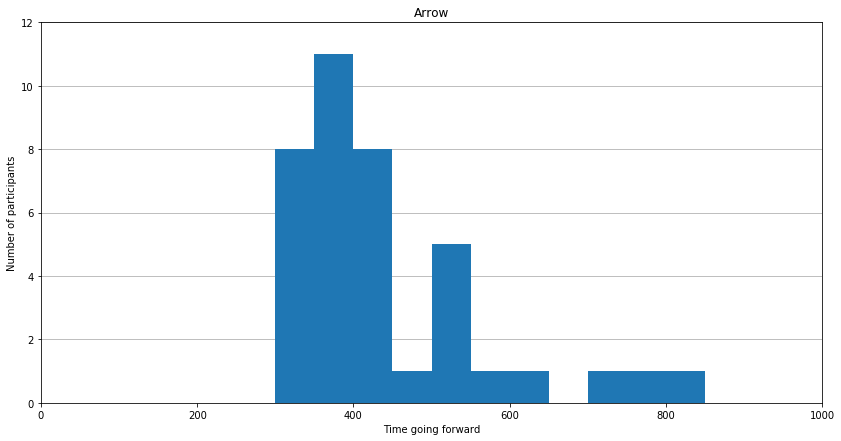

In [41]:
fig = plt.figure(figsize=(14,7))
plt.ylim(0, 12)
plt.xlim(0, 1000)
plt.hist(data.loc[data["condition"] == "Arrow", 'time going forward'], bins = 20, range = (0,1000))
plt.title("Arrow")
plt.xlabel("Time going forward")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

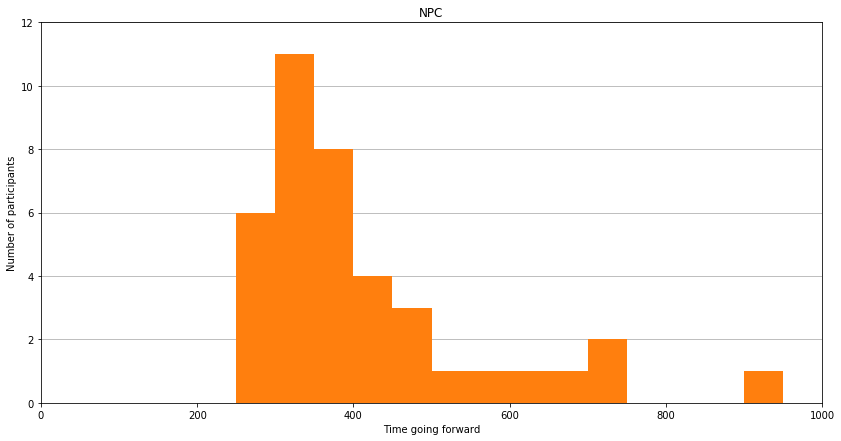

In [108]:
fig = plt.figure(figsize=(14,7))
plt.ylim(0, 12)
plt.xlim(0, 1000)
plt.hist(data.loc[data["condition"] == "NPC", 'time going forward'], bins = 20, range = (0,1000), color='tab:orange')
plt.title("NPC")
plt.xlabel("Time going forward")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

Time going back

C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


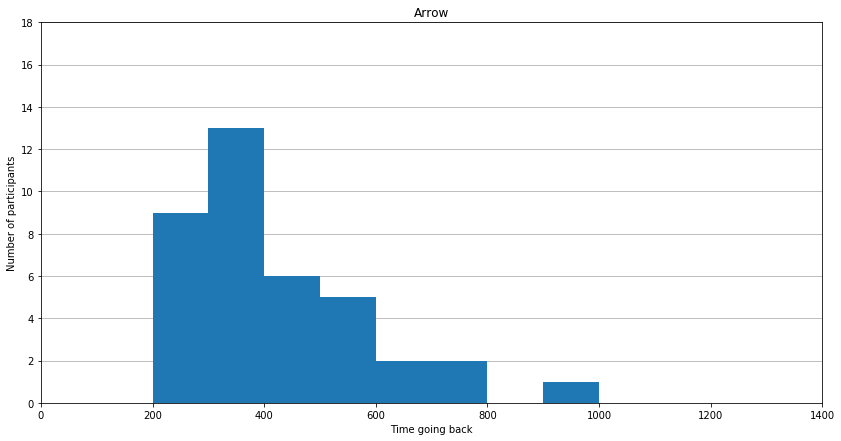

In [96]:
fig = plt.figure(figsize=(14,7))
plt.ylim(0, 18)
plt.xlim(0, 1400) 
ml = MultipleLocator(2)
plt.axes().yaxis.set_major_locator(ml)
plt.hist(data.loc[data["condition"] == "Arrow", 'time going back'], bins = 14, range = (0,1400))
plt.title("Arrow")
plt.xlabel("Time going back")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


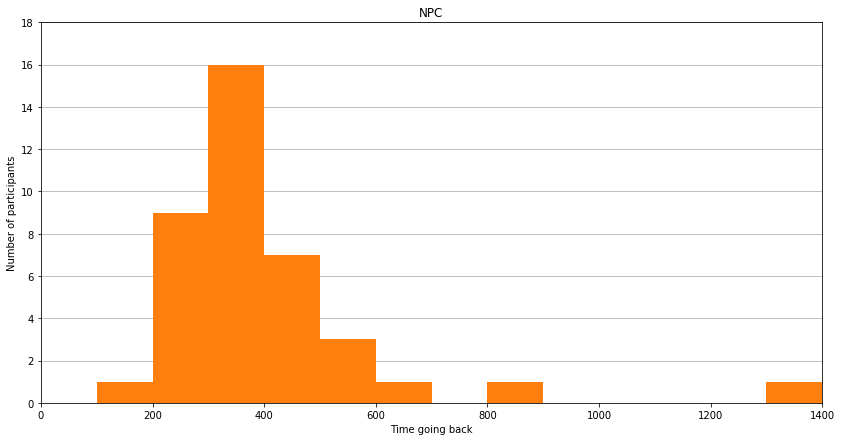

In [97]:
fig = plt.figure(figsize=(14,7))
plt.ylim(0, 18)
plt.xlim(0, 1400) 
ml = MultipleLocator(2)
plt.axes().yaxis.set_major_locator(ml)
plt.hist(data.loc[data["condition"] == "NPC", 'time going back'], bins = 14, range = (0,1400), color='tab:orange')
plt.title("NPC")
plt.xlabel("Time going back")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

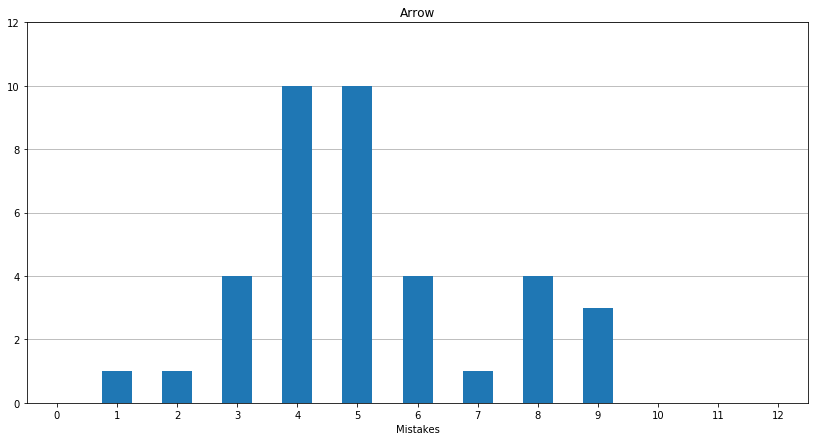

In [111]:
#Actual bar chart for the age
df = pd.DataFrame({'Mistakes':['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                          '10', '11', '12'],
                   'val':[dataA.loc[(dataA["mistakes made"] == 0), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 1), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 2), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 3), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 4), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 5), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 6), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 7), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 8), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 9), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 10), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 11), "completed game"].count(),
                          dataA.loc[(dataA["mistakes made"] == 12), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Mistakes', y='val', rot=0, figsize=(14,7), ylim = (0, 12), legend=False, title = 'Arrow')
ax.yaxis.grid(True)
ax.set_axisbelow(True)

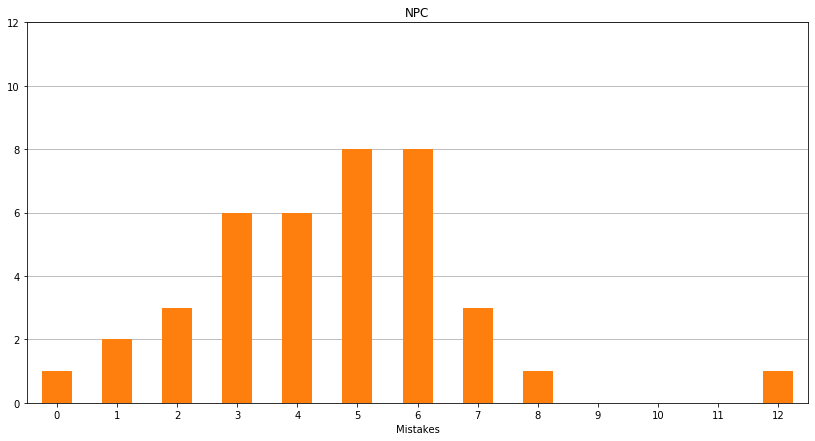

In [110]:
#Actual bar chart for the age
df = pd.DataFrame({'Mistakes':['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                          '10', '11', '12'],
                   'val':[dataB.loc[(dataB["mistakes made"] == 0), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 1), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 2), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 3), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 4), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 5), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 6), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 7), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 8), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 9), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 10), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 11), "completed game"].count(),
                          dataB.loc[(dataB["mistakes made"] == 12), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Mistakes', y='val', rot=0, figsize=(14,7), ylim = (0, 12), legend=False, color='tab:orange', title = 'NPC')
ax.yaxis.grid(True)
ax.set_axisbelow(True)


C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


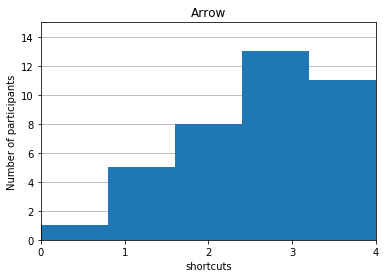

In [46]:
fig = plt.figure()
plt.hist(data.loc[data["condition"] == "Arrow", 'shortcuts taken'], bins = 5, range = (0,4))
ml = MultipleLocator(1)
plt.axes().xaxis.set_major_locator(ml)
plt.ylim(0, 15)
plt.xlim(0, 4) 

plt.title("Arrow")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of participants')

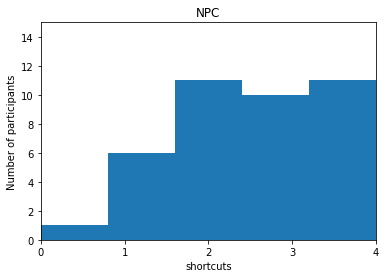

In [47]:
plt.hist(data.loc[data["condition"] == "NPC", 'shortcuts taken'], bins = 5, range = (0,4))
ml = MultipleLocator(1)
plt.axes().xaxis.set_major_locator(ml)
plt.ylim(0, 15)
plt.xlim(0, 4) 
plt.title("NPC")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")

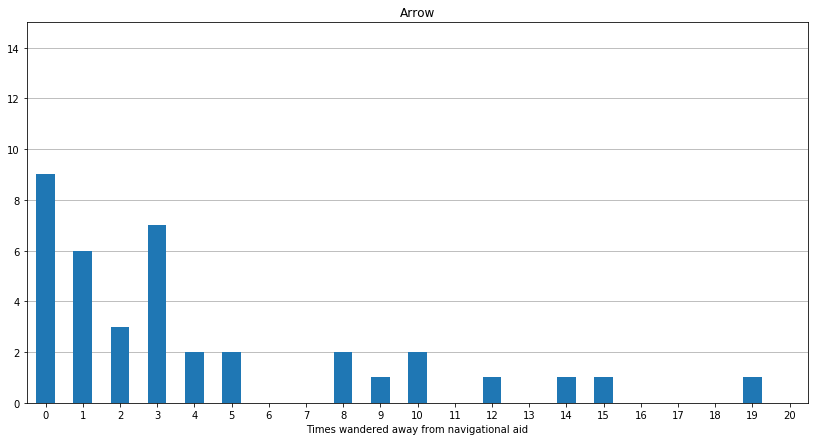

In [112]:
#Actual bar chart for the age
df = pd.DataFrame({'Times wandered away from navigational aid':['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                          '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
                   'val':[dataA.loc[(dataA["times wandered away from navigational aid"] == 0), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 1), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 2), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 3), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 4), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 5), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 6), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 7), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 8), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 9), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 10), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 11), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 12), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 13), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 14), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 15), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 16), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 17), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 18), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 19), "completed game"].count(),
                          dataA.loc[(dataA["times wandered away from navigational aid"] == 20), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Times wandered away from navigational aid', y='val', rot=0, figsize=(14,7), ylim = (0, 15), legend=False, title = 'Arrow')
ax.yaxis.grid(True)
ax.set_axisbelow(True)

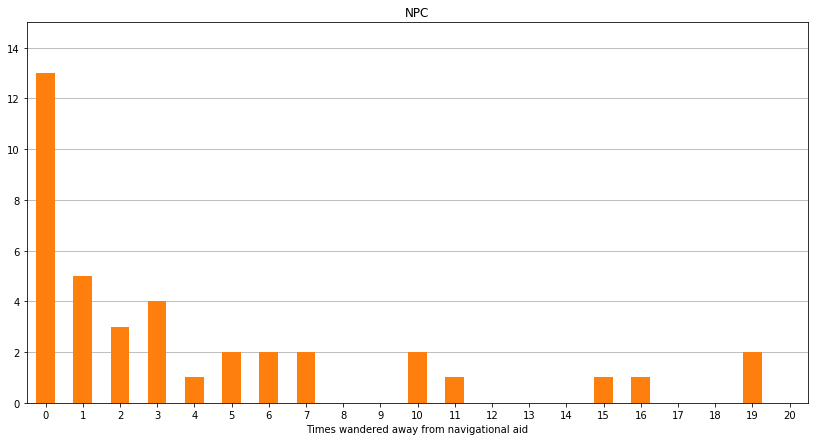

In [113]:
#Actual bar chart for the age
df = pd.DataFrame({'Times wandered away from navigational aid':['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                          '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
                   'val':[dataB.loc[(dataB["times wandered away from navigational aid"] == 0), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 1), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 2), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 3), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 4), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 5), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 6), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 7), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 8), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 9), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 10), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 11), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 12), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 13), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 14), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 15), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 16), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 17), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 18), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 19), "completed game"].count(),
                          dataB.loc[(dataB["times wandered away from navigational aid"] == 20), "completed game"].count(),
                          ]})
ax = df.plot.bar(x='Times wandered away from navigational aid', y='val', rot=0, figsize=(14,7), ylim = (0, 15), legend=False, color='tab:orange', title = 'NPC')
ax.yaxis.grid(True)
ax.set_axisbelow(True)

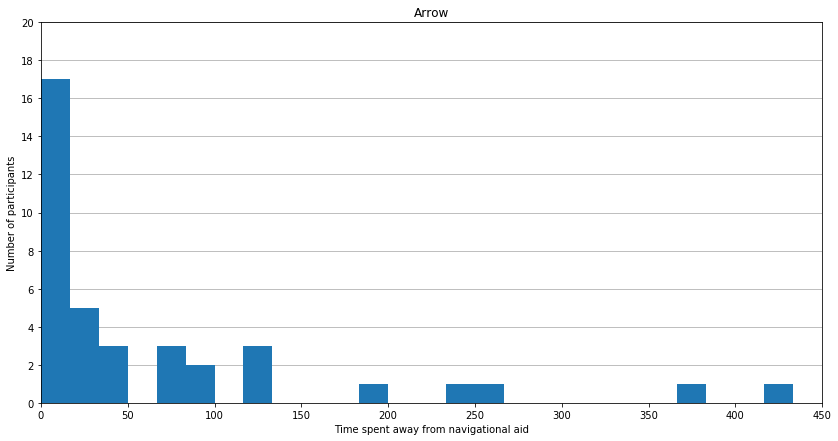

In [50]:
fig = plt.figure(figsize=(14,7))
ml = MultipleLocator(2)
plt.axes().yaxis.set_major_locator(ml)
plt.ylim(0, 20)
plt.xlim(0, 450)
plt.hist(data.loc[data["condition"] == "Arrow", 'time spent away from navigational aid'], bins = 27, range = (0, 450))
plt.title("Arrow")
plt.xlabel("Time spent away from navigational aid")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

C:\Users\Simas\Miniconda3\envs\med4\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


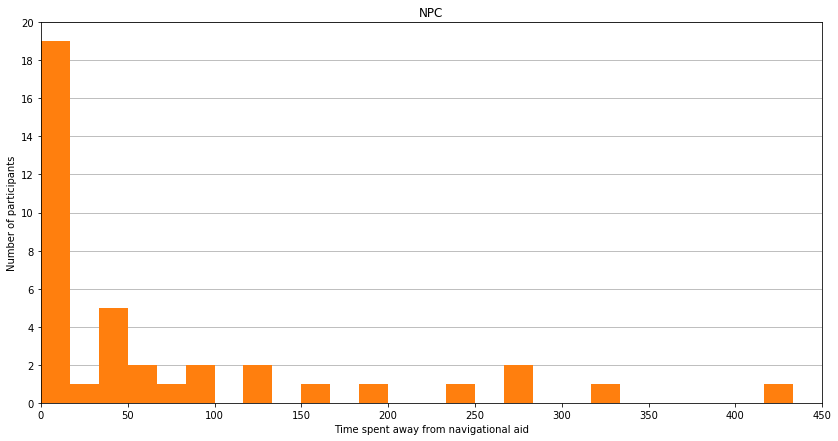

In [100]:
fig = plt.figure(figsize=(14,7))
plt.ylim(0, 20)
plt.xlim(0, 450)
ml = MultipleLocator(2)
plt.axes().yaxis.set_major_locator(ml)
plt.hist(data.loc[data["condition"] == "NPC", 'time spent away from navigational aid'], bins = 27, range = (0, 450), color='tab:orange')
plt.title("NPC")
plt.xlabel("Time spent away from navigational aid")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

### Comparing Seeker and non-seeker data

In [52]:
seeker = data.loc[data["player archetype"] == "Seeker"]
nonSeeker = data.loc[data["player archetype"] != "Seeker"]


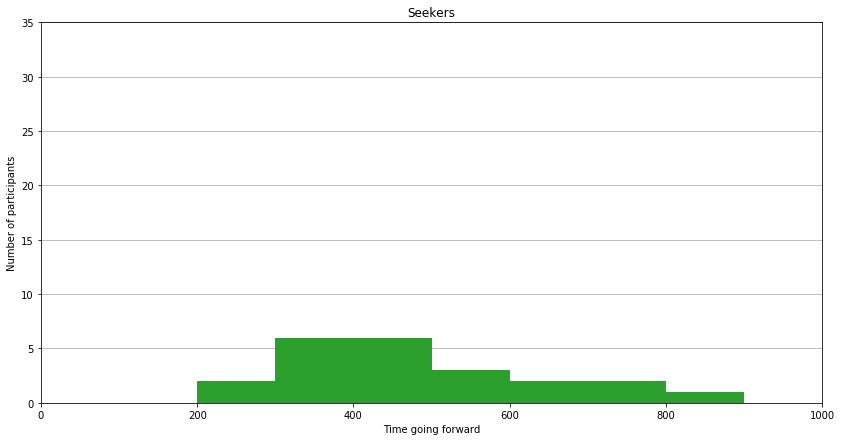

In [102]:
fig = plt.figure(figsize=(14,7))
plt.hist(seeker['time going forward'], bins = 10, range = (0,1000), color='tab:green')
plt.ylim(0, 35)
plt.xlim(0, 1000)
plt.title("Seekers")
plt.xlabel("Time going forward")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

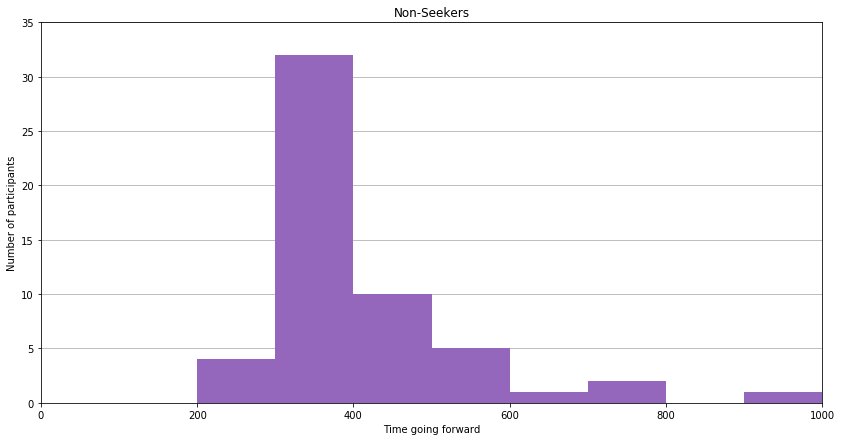

In [104]:
fig = plt.figure(figsize=(14,7))
plt.hist(nonSeeker['time going forward'], bins = 10, range = (0,1000), color='tab:purple')
plt.ylim(0, 35)
plt.xlim(0, 1000)
plt.title("Non-Seekers")
plt.xlabel("Time going forward")
plt.ylabel("Number of participants")
ax = fig.gca()
ax.yaxis.grid(True)
ax.set_axisbelow(True)

### Descriptive Statistics

In [57]:
arrowMean = data.loc[data["condition"] == "Arrow", 'time going back'].mean()
npcMean = data.loc[data["condition"] == "NPC", 'time going back'].mean()
arrowStd = data.loc[data["condition"] == "Arrow", 'time going back'].std()
npcStd = data.loc[data["condition"] == "NPC", 'time going back'].std()
print(arrowMean)
print(npcMean)
print(arrowStd)
print(npcStd)


418.957902631579
404.8133392307692
170.11265861347292
196.44683919787812


In [58]:
arrowMean = data.loc[data["condition"] == "Arrow", 'mistakes made'].mean()
npcMean = data.loc[data["condition"] == "NPC", 'mistakes made'].mean()
arrowStd = data.loc[data["condition"] == "Arrow", 'mistakes made'].std()
npcStd = data.loc[data["condition"] == "NPC", 'mistakes made'].std()
print(arrowMean)
print(npcMean)
print(arrowStd)
print(npcStd)

5.131578947368421
4.589743589743589
1.9613984618203648
2.2090477672035016


Find effect size using Cohens d

In [59]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

x = data.loc[data["condition"] == "Arrow", 'time going back']
y = data.loc[data["condition"] == "NPC", 'time going back']
#print(x)

#correct only if nx=ny
d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
print ("d by the 1st method = " + str(d))
if (len(x) != len(y)):
    print("The first method is incorrect because nx is not equal to ny.")

#correct for more general case including nx !=ny
print ("d by the more general 2nd method = " + str(cohen_d(x,y)))

d by the 1st method = 0.07697633107439023
The first method is incorrect because nx is not equal to ny.
d by the more general 2nd method = 0.07690307978071997


If the data is parametric we use independant t-test: ttest_ind

If it is not parametric :( we use: mannwhitneyu

### Preconditions for t-test: is the data parametric?


In [60]:
import numpy
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
stats.shapiro(arrowTime)

(0.9044489860534668, 0.0034119149204343557)

In [61]:
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
stats.shapiro(npcTime)

(0.6892072558403015, 8.487182867611409e-08)

#### Trying logarithmic transformation

In [62]:
arrowTimeLog = numpy.log(arrowTime)
stats.shapiro(arrowTimeLog)

(0.9748081564903259, 0.5364501476287842)

In [63]:
npcTimeLog = numpy.log(npcTime)
stats.shapiro(npcTimeLog)

(0.9173105359077454, 0.007189383264631033)

#### Try removing outlier

In [64]:
dataWithoutOutlier = data.loc[data["participant number"] != "B12"]
dataWithoutOutlier.describe()

,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,age
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,430.211052,399.865269,4.763158,2.657895,4.197368,70.270126,24.434211
std,138.804106,150.924423,1.938167,1.114183,5.127754,104.746519,3.910108
min,284.680000,191.239990,0.000000,0.000000,0.000000,0.000000,20.000000
25%,337.510000,301.090000,4.000000,2.000000,0.000000,0.000000,22.000000
50%,377.940000,369.879975,5.000000,3.000000,2.500000,26.300005,23.000000
75%,480.080005,466.079993,6.000000,4.000000,6.000000,90.839968,26.250000
max,926.880000,981.280000,9.000000,4.000000,19.000000,419.799960,36.000000


In [65]:
arrowTimeNoOutlier = dataWithoutOutlier.loc[dataWithoutOutlier["condition"] == "Arrow", 'time going back']
arrowTimeLogNoOutlier = numpy.log(arrowTimeNoOutlier)
stats.shapiro(arrowTimeLogNoOutlier)

(0.9748081564903259, 0.5364501476287842)

In [66]:
npcTimeNoOutlier = dataWithoutOutlier.loc[dataWithoutOutlier["condition"] == "NPC", 'time going back']
npcTimeLogNoOutlier = numpy.log(npcTimeNoOutlier)
stats.shapiro(npcTimeLogNoOutlier)

(0.9740694761276245, 0.5123112797737122)

In [67]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
stats.shapiro(arrowMistakes)

(0.9273658990859985, 0.016585014760494232)

In [68]:
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.shapiro(npcMistakes)

(0.9435592293739319, 0.04996420070528984)

In [69]:
arrowMistakesLog = numpy.log(1 + arrowMistakes)
stats.shapiro(arrowMistakesLog)

(0.9270862340927124, 0.01625504344701767)

In [70]:
npcMistakesLog = numpy.log(1 + npcMistakes)
stats.shapiro(npcMistakesLog)

(0.894785463809967, 0.0015691217267885804)

#### Checking variance

In [71]:
stats.levene(arrowTime, npcTime)

LeveneResult(statistic=0.18135143945539442, pvalue=0.6714340222275595)

In [72]:
stats.levene(arrowTimeLog, npcTimeLog)

LeveneResult(statistic=0.6479427744750514, pvalue=0.4233936276820959)

In [73]:
stats.levene(arrowTimeLogNoOutlier, npcTimeLogNoOutlier)

LeveneResult(statistic=2.223867666024366, pvalue=0.14014299083860562)

#### QQ plots

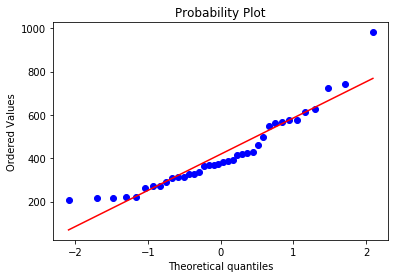

In [74]:
stats.probplot(arrowTime, plot = plt)
plt.show()

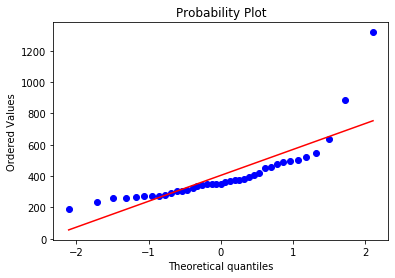

In [75]:
stats.probplot(npcTime, plot = plt)
plt.show()

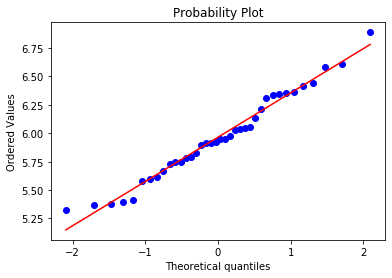

In [76]:
stats.probplot(arrowTimeLog, plot = plt)
plt.show()

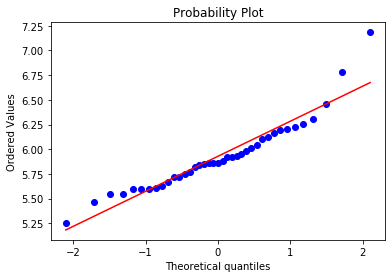

In [77]:
stats.probplot(npcTimeLog, plot = plt)
plt.show()

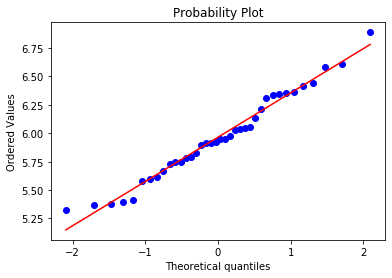

In [78]:
stats.probplot(arrowTimeLogNoOutlier, plot = plt)
plt.show()

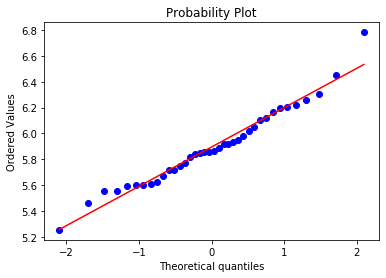

In [79]:
stats.probplot(npcTimeLogNoOutlier, plot = plt)
plt.show()

### Comparing time going back

In [80]:
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.3373824376949503, pvalue=0.7367710285191662)

In [81]:
stats.ttest_ind(arrowTimeLog, npcTimeLog)

Ttest_indResult(statistic=0.4318016115657696, pvalue=0.6671244316906774)

In [82]:
stats.ttest_ind(arrowTimeLogNoOutlier, npcTimeLogNoOutlier)

Ttest_indResult(statistic=0.8840647536008032, pvalue=0.37952460573673363)

### Comparing time going forward

In [83]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going forward']
npcTime = data.loc[data["condition"] == "NPC", 'time going forward']
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.6171469132215112, pvalue=0.5390069605916492)

### Comparing mistakes made

In [84]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=1.1370689759148231, pvalue=0.2591293025406745)

### Comparing mistakes made - non parametric test

In [85]:
arrowMistakes = data.loc[data["condition"] == "Arrow", 'mistakes made']
npcMistakes = data.loc[data["condition"] == "NPC", 'mistakes made']
stats.mannwhitneyu(arrowMistakes, npcMistakes)

MannwhitneyuResult(statistic=650.0, pvalue=0.17479676294704832)

### Boxplot

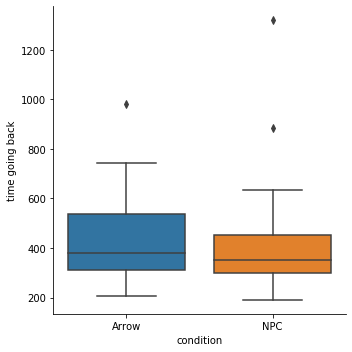

In [86]:
sns.catplot(x = 'condition', y = "time going back", kind = "box", data = data)

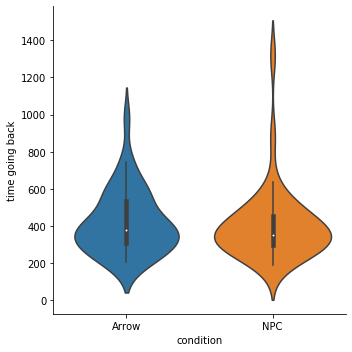

In [87]:
sns.catplot(x = 'condition', y = "time going back", kind = "violin", data = data)

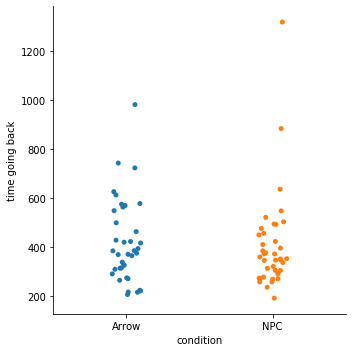

In [88]:
sns.catplot(x = 'condition', y = "time going back", kind = "strip", data = data)

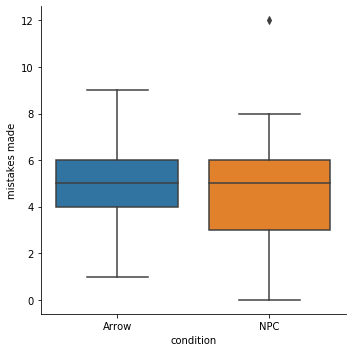

In [89]:
sns.catplot(x = 'condition', y = "mistakes made", kind = "box", data = data)